# Template for doing regression analysis

## First we import relevant libraries

In [1]:
# Data manipulation
import pandas as pd

In [2]:
# Machine Learning
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cross-validation: KFold provides train/test indices to split data
from sklearn.model_selection import KFold

In [4]:
# Statistics and regression for p-values
import statsmodels.api as sm
# from scipy import stats

In [11]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3)

## Reading data

In [29]:
# Read the csv file
df = pd.read_csv('../data/intro-stat-learn/Advertising.csv')

# We drop the first column in this case since it's just the index
df = df.drop(df.columns[0], axis=1)

## Now we do some very simple descriptive data exploration

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Histogram

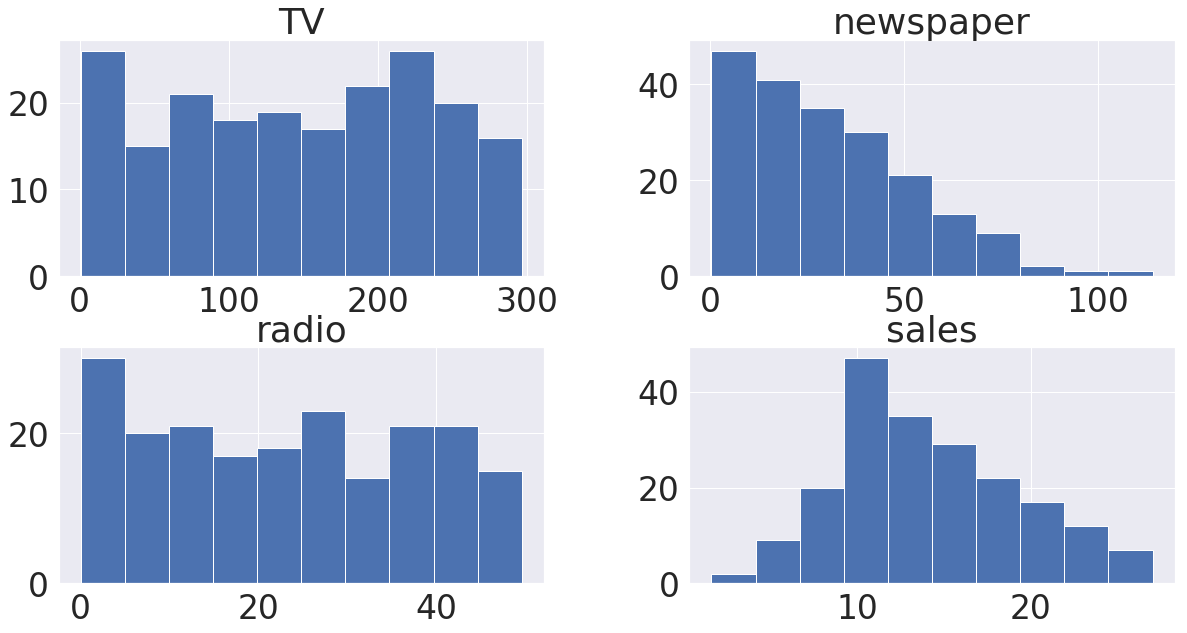

In [30]:
df.hist(figsize=(20,10));

### Correlation Matrix

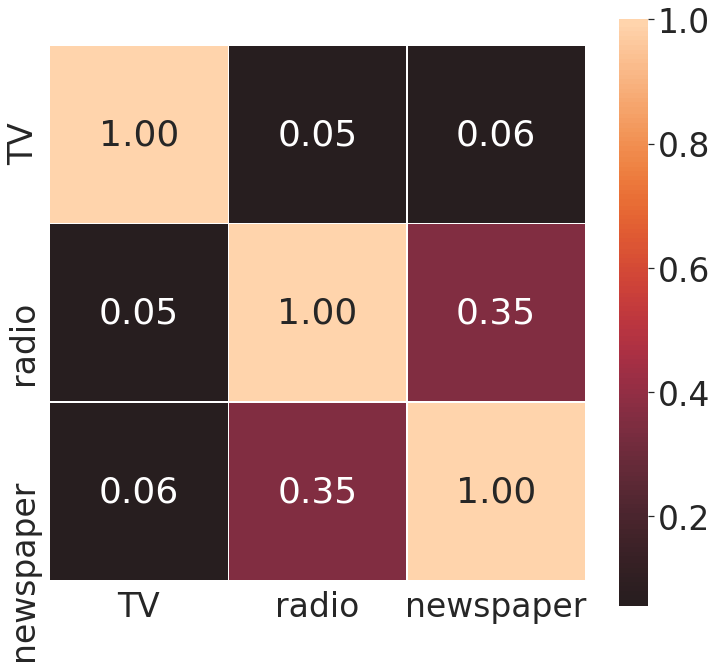

In [26]:
# Correlation matrix
correlations = df.drop('sales', axis=1).corr()

plt.figure(figsize=(12,12));
ax = plt.axes()

sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .90}, ax=ax);

## Now we do linear regression

### Using SCIKIT-LEARN

In [36]:
# Create an instace of the cross-validation object
# -> If we use shuffle=True, then the data gets shuffled before doing the split
kf = KFold(n_splits=4, random_state=None, shuffle=False)

# Create an instance of the linear regression object
regr = linear_model.LinearRegression()

for train_index, test_index in kf.split(df):

    X_train = df.iloc[train_index][['TV', 'radio', 'newspaper']]
    y_train = df.iloc[train_index][['sales']]
    
    X_test = df.iloc[test_index][['TV', 'radio', 'newspaper']]
    y_test = df.iloc[test_index][['sales']]
    
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    
    print('R^2 score = %.2f' % r2_score(y_test, y_pred))
    
    print(regr.coef_)
    print(regr.intercept_)

R^2 score = 0.89
[[0.04618005 0.18748132 0.00365203]]
[2.81052093]
R^2 score = 0.92
[[ 0.0452422   0.18796982 -0.00033208]]
[2.86443316]
R^2 score = 0.86
[[ 0.04442918  0.19943848 -0.00723282]]
[3.13005413]
R^2 score = 0.90
[[ 0.04700012  0.17993257 -0.00140273]]
[3.0297668]


### Using Statsmodels

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     433.0
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.95e-72
Time:                        12:28:29   Log-Likelihood:                -290.37
No. Observations:                 150   AIC:                             588.7
Df Residuals:                     146   BIC:                             600.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8105      0.353      7.969      0.0

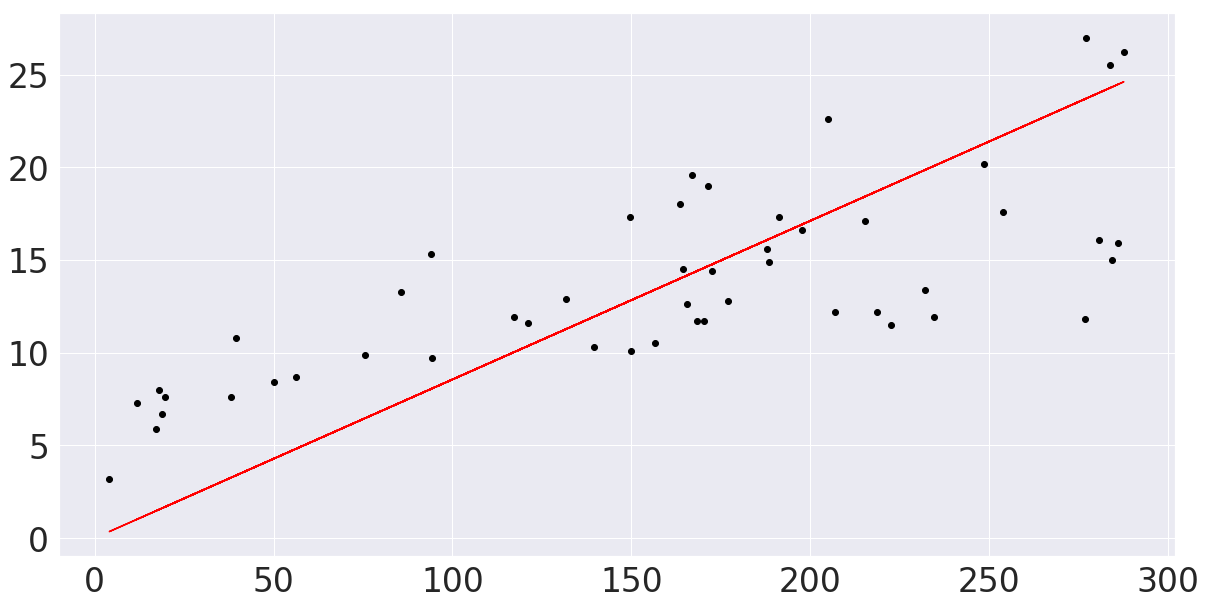

In [24]:
# Using Statsmodels library

# Create an instace of the cross-validation object
# -> If we use shuffle=True, then the data gets shuffled before doing the split
kf = KFold(n_splits=4, random_state=None, shuffle=False)

scores = []
for train_index, test_index in kf.split(df):
    
#     df_train = df.iloc[train_index]
#     df_test  = df.iloc[test_index]
    
    X_train = df.iloc[train_index][['TV', 'radio', 'newspaper']]
    y_train = df.iloc[train_index][['sales']]
    
    X_test = df.iloc[test_index][['TV', 'radio', 'newspaper']]
    y_test = df.iloc[test_index][['sales']]
    
    # OLS = Ordinary Least Squares
    X2_train = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2_train)
    
    est2 = est.fit()
    print(est2.summary())
    
    X2_test = sm.add_constant(X_test)
    y_pred = est2.predict(X2_test)
    
    scores.append(r2_score(y_test, y_pred))
    
# Here we just plot the last one
col = 'TV'

# OLS = Ordinary Least Squares
X2_train = sm.add_constant(X_train[col])
est = sm.OLS(y_train, X2_train[col])

est2 = est.fit()
print(est2.summary())

X2_test = sm.add_constant(X_test[col])
y_pred = est2.predict(X2_test[col])

plt.figure(figsize=(20,10))
plt.scatter(X_test[col], y_test, color='black')
plt.plot(X_test[col], y_pred, color='red')

for score in scores:
    print('R^2 score = %.2f' % score )
    